<a href="https://colab.research.google.com/github/Azadshokrollahi/Artificial-intelligence-for-data-science-/blob/main/Lab2.2-svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#EE15D'>**SVM**</font>

<font color='#EE15D'>**Questions:**</font>

1.   LinearSVC section: Create 2 models (model1, model2), compare the results after visulizations, Which one is a better classifier for this dataset?
2.   SVC section: Create one model (model3), with SVC and compare it with 2 previous models after visulizations .
1.   Use model3.support_ and model3.n_support_ to determine the number of support vectors in each class in model 3. Visualize the support vectors. How many support vectors are there in Class 1 and Class 2 (separately)?
2.   NuSVC section, Create one model (model4) with NuSVC, and compare it with 3 previous models after visulizations.
1.   Visualize model 4 and compare the number of support vector machines with model 3.
2.   Kernel Trick section: Create 3 models (model5, model6, and model7), Visualize the results of the 3 models and interpret them. Which model best fits the data?

<font color='#EE15D'>Note:</font> Proceed through the code, answering the questions one by one in separate cells, each inserted after its corresponding question.






## **🔸 Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<font color='#EE15D'>Note:</font>  Before starting, if you are not familiar with scikit-learn or how to import, please study this link.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html



## **🔸 SVM (sklearn)**

In [2]:
from sklearn.svm import LinearSVC, SVC, NuSVC

<font color='#EE15D'>We have created a dataset with 1000 samples and 2 classes

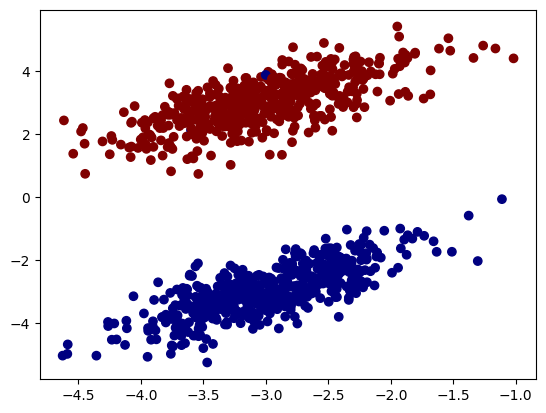

In [3]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

### `LinearSVC`

<font color='#GG15D'>**Question1:**</font> <font color='#EE15D'>Create 2 models based on the following hyperparameters and compare the results after visulizations:



*   **model1**: LinearSVC, loss= hinge, C=1.2, max_iter=2000
*   **model2**: LinearSVC, loss= squared_hinge, C=2.5, max_iter=1000

<font color='#EE15D'>Which one is a better classifier for this dataset?





In [4]:
model1 = LinearSVC(loss='hinge',C=1.2,max_iter=2000)
model1.fit(X, y)

,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,1.2
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [5]:
model2 = LinearSVC(loss='squared_hinge',C=2.5,max_iter=1000)
model2.fit(X, y)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,2.5
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


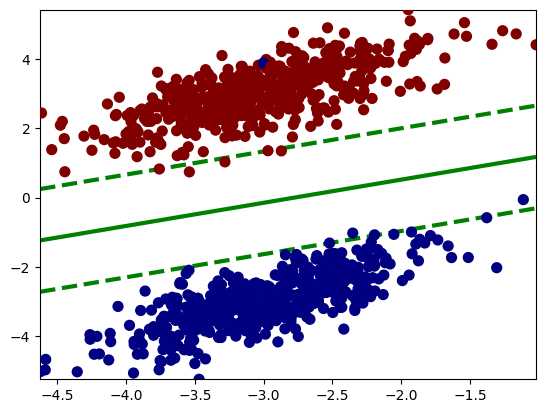

In [6]:
#Use this code for visualization for both models
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model1.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

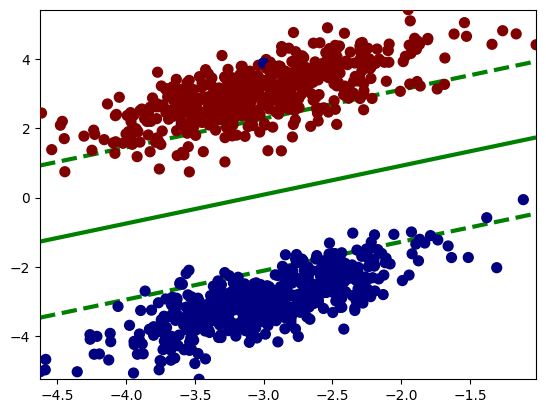

In [7]:
#Use this code for visualization for both models
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model2.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

<font color='#EE15D'> Answer 1:

The second model seems to be a better classifier for this dataset since the soft margins are wider being less prone to overfitting and a better generalization of the dataset. It is also possible to observe that the support vector classifier of the second model fits better the skewness of the data.

### `SVC`

<font color='#GG15D'>**Question2:** </font> <font color='#EE15D'>Create one model (model3) with SVC based on the following info and compare it with 2 previous models after visulizations:



*   **model3**: SVC, C=1.0, kernel=linear, probability=True



In [11]:
model3 = SVC(C=1.0, kernel='linear', probability=True)
model3.fit(X, y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


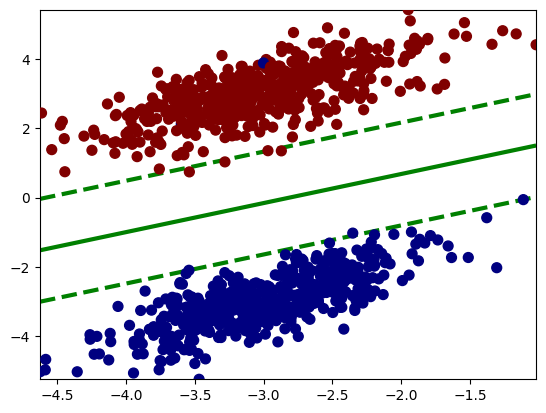

In [12]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model3.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)


<font color='#EE15D'> Answer 2:

This third model seems to be identical with the first model with narrower soft margins than the second model. I would still keep the second model as the best classifier.

<font color='#GG15D'>**Question3**:</font> Use <font color='#EE15D'> model3.support_</font> and <font color='#EE15D'>model3.n_support_</font> to determine the number of support vectors in each class. Then, use the code below to visualize the support vectors. How many support vectors are there in Class 1 and Class 2 (separately)?

In [13]:
model3.support_, model3.n_support_

(array([154, 225, 770, 808, 902, 115, 208, 819, 930], dtype=int32),
 array([5, 4], dtype=int32))

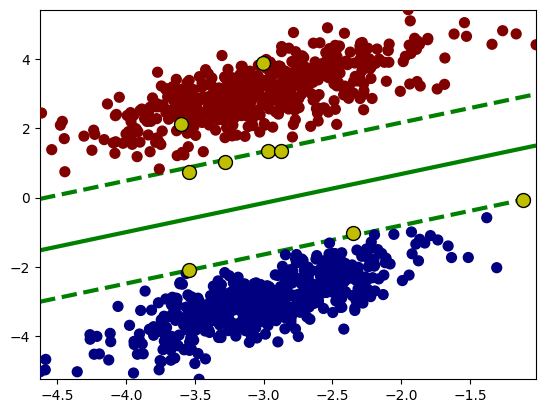

In [14]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model3.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)
sv = model3.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='y', s=100, edgecolors='k')

<font color='#EE15D'> Answer 3:

For this third model there are 4 support vectors for Class 1 (blue) and 5 support vectors for Class 2 (red)

### `NuSVC`

<font color='#GG15D'>**Question4**:</font> <font color='#EE15D'>Create one model (model4) with NuSVC based on the following hyperparameters and compare it with 3 previous models after visulizations:



*   **model4**: NuSVC, nu=0.95, kernel=linear, probability=True


In [15]:
model4 = NuSVC(nu=0.05, kernel='linear', probability=True)
model4.fit(X, y)

,nu,0.05
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


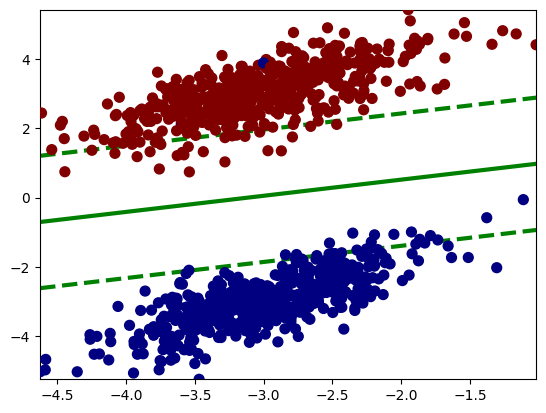

In [17]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model4.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)


<font color='#EE15D'> Answer 4:

In model four the soft margins are wide like in model two but in this model the support vector classifier is less skewed.

<font color='#GG15D'>**Question5**:</font> <font color='#EE15D'>Visualize model 4 with the following code and compare the number of support vector machines with model 3.

In [19]:
model4.support_, model4.n_support_

(array([ 29,  61,  94, 103, 154, 166, 171, 206, 225, 242, 255, 262, 296,
        342, 600, 710, 712, 721, 770, 808, 860, 895, 902, 906, 909,  26,
        115, 208, 220, 283, 295, 322, 422, 472, 529, 549, 560, 583, 677,
        729, 733, 760, 768, 769, 819, 868, 930, 936, 960, 961], dtype=int32),
 array([25, 25], dtype=int32))

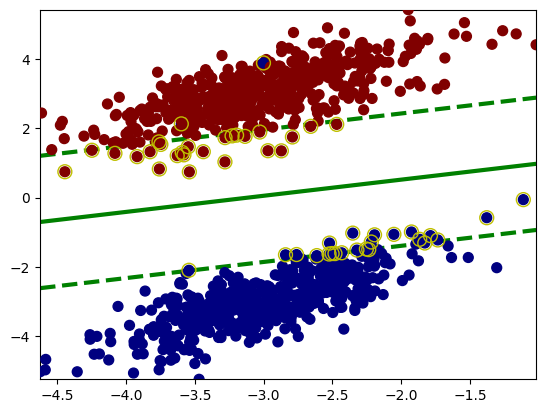

In [18]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model4.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model4.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

<font color='#EE15D'> Answer 5:

In model 4 there are 25 support vectors for each class, 50 in total. This is a big difference from model 3 which only contained 9 support vectors in total.

## **🔸 Kernel Trick (sklearn)**

<font color='#EE15D'>When the dataset is not linearly separable

In [20]:
from sklearn.svm import SVC

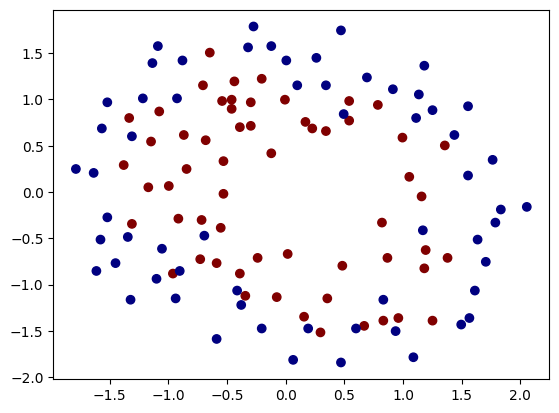

In [23]:
#Load the dataset
data = np.loadtxt('Lab2-Data/ex2data2.txt', delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

<font color='#GG15D'>**Question6**: <font color='#EE15D'>Create 3 models (model5, model6, and model7) with the following hyperparameters:



*   **model5** : SVC, C=1.0, kernel=poly, degree=2, coef0=1
*   **model6** : SVC, C=1.0, kernel=rbf, degree=2, coef0=1
*   **model7** : SVC, C=1.0, kernel=sigmoid, degree=2, coef0=1

<font color='#EE15D'>Visualize the results of the 3 models and interpret them. Which model best fits the data?






In [25]:
model5 = SVC(C=1.0, kernel='poly',degree=2,coef0=1)
model5.fit(X, y)

,C,1.0
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,1
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
model6 = SVC(C=1.0, kernel='rbf',degree=2,coef0=1)
model6.fit(X, y)

,C,1.0
,kernel,'rbf'
,degree,2
,gamma,'scale'
,coef0,1
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [27]:
model7 = SVC(C=1.0, kernel='sigmoid',degree=2,coef0=1)
model7.fit(X, y)

,C,1.0
,kernel,'sigmoid'
,degree,2
,gamma,'scale'
,coef0,1
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


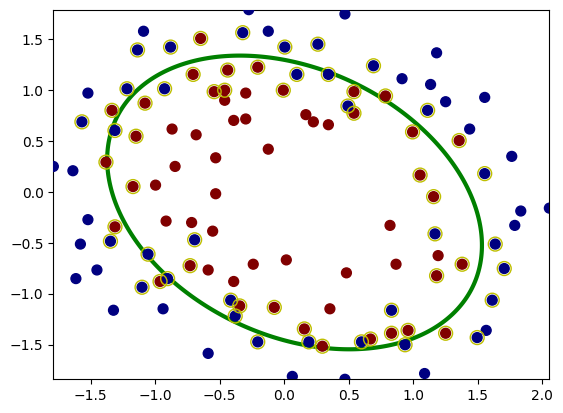

In [28]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model5.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model5.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

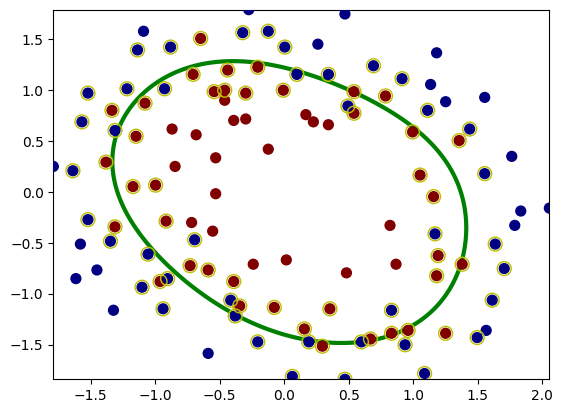

In [29]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model6.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model6.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

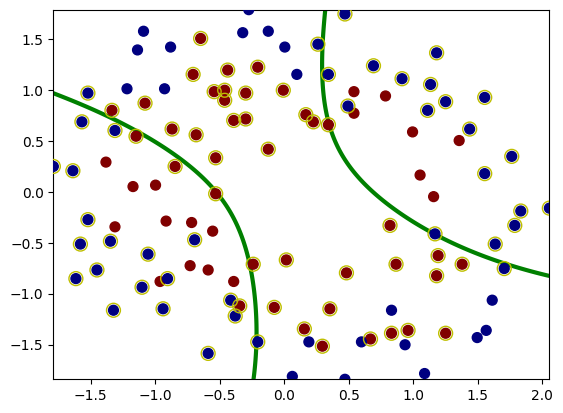

In [30]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model7.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model7.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

<font color='#EE15D'> Answer 6:

* Model 5 captures well the non-linearity of the data, but in comparison with model 6 the margin is smaller, leaving more red points either outside of the margin or at the edge.
* Model 6 captures well the non-linearity of the data as well, and fits better the data, since the margins between the two classes are more broad than model 5, and include more red points.
* Model 7 completely fails to capture the circular division of the classes, we can then rule out the suitableness of this model.

Model 6 is then the model that suits best this dataset.